In [4]:
# Movie recommendation system is the system the provide to users a movie based on prediction from analysis on the data givento train it. 
# Movie recommendation wil be based on a filtering process. The first which is content-based filtering and the other which is the collaborative filtering. 

# For this movie recommendation system we'll be using NLTK

In [5]:
# Importing libraries for Data preprocessing
import pandas as pd
import numpy as np

In [6]:
# Accessing csv_files
movies = pd.read_csv('Data/tmdb_5000_movies.csv')
credit = pd.read_csv('Data/tmdb_5000_credits.csv')

In [7]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [8]:
credit.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [9]:
# Merging the movies and credits dataframe
movies = movies.merge(credit, on='title')

In [10]:
movies.shape

(4809, 23)

In [11]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [12]:
movies = movies[['movie_id', 'title', 'genres', 'overview', 'original_language', 'cast', 'keywords', 'crew']]

In [13]:
movies.head()

,movie_id,title,genres,overview,original_language,cast,keywords,crew
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","In the 22nd century, a paraplegic Marine is di...",en,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","Captain Barbossa, long believed to be dead, ha...",en,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",A cryptic message from Bond’s past sends him o...,en,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Following the death of District Attorney Harve...,en,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","John Carter is a war-weary, former military ca...",en,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [14]:
movies.isnull().sum()

movie_id             0
title                0
genres               0
overview             3
original_language    0
cast                 0
keywords             0
crew                 0
dtype: int64

In [15]:
movies.dropna(inplace=True)

In [16]:
movies.duplicated().sum()

0

In [17]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [18]:
#  ast (Abstract Syntax Trees) module to safely evaluate a string containing a Python literal 
# (e.g., a string representation of a list, dictionary, tuple, etc.) into an actual Python object. In this case a list of dictionaries

import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [19]:
# transform function to be applied to the genre column
def transform(obj):
    List = []

    for i in ast.literal_eval(obj):
        List.append(i['name'])
    return List

In [20]:
movies['genres'] = movies['genres'].apply(transform)

In [21]:
movies.head()

,movie_id,title,genres,overview,original_language,cast,keywords,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","In the 22nd century, a paraplegic Marine is di...",en,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","Captain Barbossa, long believed to be dead, ha...",en,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[Action, Adventure, Crime]",A cryptic message from Bond’s past sends him o...,en,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",Following the death of District Attorney Harve...,en,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","John Carter is a war-weary, former military ca...",en,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [22]:
movies['keywords'] = movies['keywords'].apply(transform)
movies['keywords'].head()

0    [culture clash, future, space war, space colon...
1    [ocean, drug abuse, exotic island, east india ...
2    [spy, based on novel, secret agent, sequel, mi...
3    [dc comics, crime fighter, terrorist, secret i...
4    [based on novel, mars, medallion, space travel...
Name: keywords, dtype: object

In [23]:
movies['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [24]:
movies['cast'].isnull().sum()

0

In [25]:
def transform1(obj):
    List = []
    counter = 0

    for i in ast.literal_eval(obj):
        if counter != 3:
            List.append(i['name'])
            counter += 1
        else: 
            break
    return List

In [26]:
movies['cast'] = movies['cast'].apply(transform1)

In [27]:
movies['cast'].head(5)

0    [Sam Worthington, Zoe Saldana, Sigourney Weaver]
1       [Johnny Depp, Orlando Bloom, Keira Knightley]
2        [Daniel Craig, Christoph Waltz, Léa Seydoux]
3        [Christian Bale, Michael Caine, Gary Oldman]
4      [Taylor Kitsch, Lynn Collins, Samantha Morton]
Name: cast, dtype: object

In [28]:
movies.head()

,movie_id,title,genres,overview,original_language,cast,keywords,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","In the 22nd century, a paraplegic Marine is di...",en,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[culture clash, future, space war, space colon...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","Captain Barbossa, long believed to be dead, ha...",en,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[ocean, drug abuse, exotic island, east india ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[Action, Adventure, Crime]",A cryptic message from Bond’s past sends him o...,en,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[spy, based on novel, secret agent, sequel, mi...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",Following the death of District Attorney Harve...,en,"[Christian Bale, Michael Caine, Gary Oldman]","[dc comics, crime fighter, terrorist, secret i...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","John Carter is a war-weary, former military ca...",en,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[based on novel, mars, medallion, space travel...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [29]:
movies['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [30]:
def fetch_director(text):
    List = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            List.append(i['name'])
    return List

In [31]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [76]:
movies

,movie_id,title,genres,overview,original_language,cast,keywords,crew,tags
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[In, the, 22nd, century,, a, paraplegic, Marin...",en,"[SamWorthington, ZoeSaldana, SigourneyWeaver]","[cultureclash, future, spacewar, spacecolony, ...",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[Captain, Barbossa,, long, believed, to, be, d...",en,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]","[ocean, drugabuse, exoticisland, eastindiatrad...",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[Action, Adventure, Crime]","[A, cryptic, message, from, Bond’s, past, send...",en,"[DanielCraig, ChristophWaltz, LéaSeydoux]","[spy, basedonnovel, secretagent, sequel, mi6, ...",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[Following, the, death, of, District, Attorney...",en,"[ChristianBale, MichaelCaine, GaryOldman]","[dccomics, crimefighter, terrorist, secretiden...",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","[John, Carter, is, a, war-weary,, former, mili...",en,"[TaylorKitsch, LynnCollins, SamanthaMorton]","[basedonnovel, mars, medallion, spacetravel, p...",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...,...,...,...,...,...,...
4804,9367,El Mariachi,"[Action, Crime, Thriller]","[El, Mariachi, just, wants, to, play, his, gui...",es,"[CarlosGallardo, JaimedeHoyos, PeterMarquardt]","[unitedstates–mexicobarrier, legs, arms, paper...",[RobertRodriguez],"[El, Mariachi, just, wants, to, play, his, gui..."
4805,72766,Newlyweds,"[Comedy, Romance]","[A, newlywed, couple's, honeymoon, is, upended...",en,"[EdwardBurns, KerryBishé, MarshaDietlein]",[],[EdwardBurns],"[A, newlywed, couple's, honeymoon, is, upended..."
4806,231617,"Signed, Sealed, Delivered","[Comedy, Drama, Romance, TVMovie]","[""Signed,, Sealed,, Delivered"", introduces, a,...",en,"[EricMabius, KristinBooth, CrystalLowe]","[date, loveatfirstsight, narration, investigat...",[ScottSmith],"[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,126186,Shanghai Calling,[],"[When, ambitious, New, York, attorney, Sam, is...",en,"[DanielHenney, ElizaCoupe, BillPaxton]",[],[DanielHsia],"[When, ambitious, New, York, attorney, Sam, is..."


In [33]:
movies.head()

,movie_id,title,genres,overview,original_language,cast,keywords,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","In the 22nd century, a paraplegic Marine is di...",en,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[culture clash, future, space war, space colon...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","Captain Barbossa, long believed to be dead, ha...",en,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[ocean, drug abuse, exotic island, east india ...",[Gore Verbinski]
2,206647,Spectre,"[Action, Adventure, Crime]",A cryptic message from Bond’s past sends him o...,en,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[spy, based on novel, secret agent, sequel, mi...",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",Following the death of District Attorney Harve...,en,"[Christian Bale, Michael Caine, Gary Oldman]","[dc comics, crime fighter, terrorist, secret i...",[Christopher Nolan]
4,49529,John Carter,"[Action, Adventure, Science Fiction]","John Carter is a war-weary, former military ca...",en,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[based on novel, mars, medallion, space travel...",[Andrew Stanton]


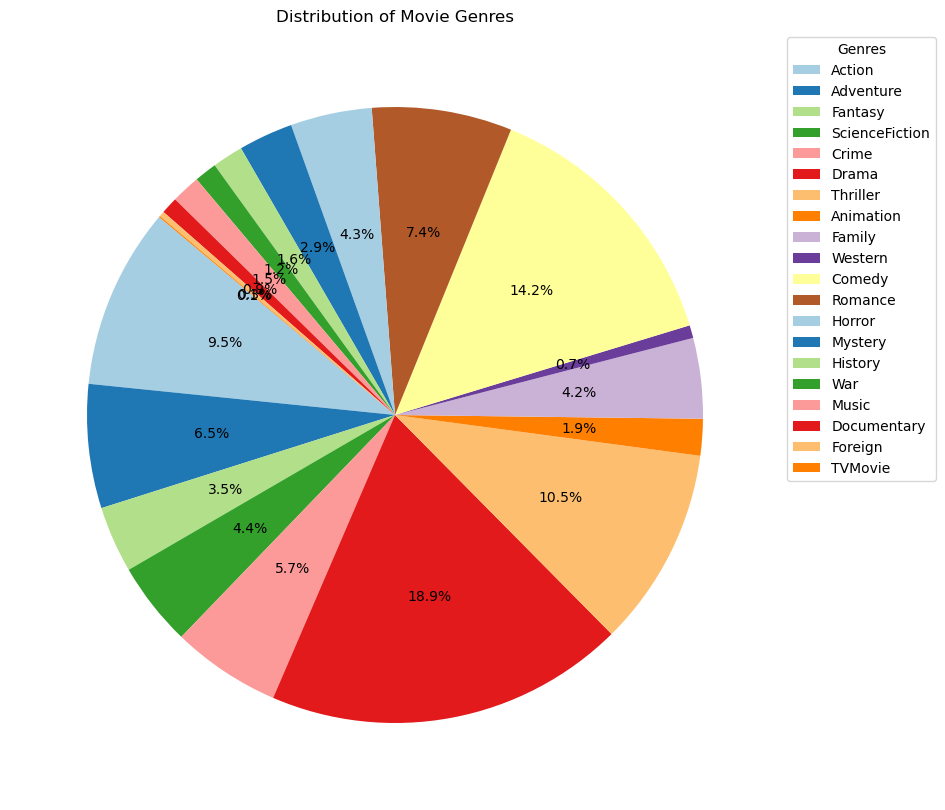

In [81]:
from collections import Counter
import matplotlib.pyplot as plt

# Flatten the list of genres
all_genres = [genre for sublist in movies['genres'] for genre in sublist]

# Count the frequency of each genre
genre_counts = Counter(all_genres)

# Separate common genres and group the less common ones into "Others"
common_threshold = 3  # Define a threshold for what counts as "common"
common_genres = {genre: count for genre, count in genre_counts.items() if count >= common_threshold}
others_count = sum(count for genre, count in genre_counts.items() if count < common_threshold)

# Add "Others" category if there are any genres below the threshold
if others_count > 0:
    common_genres['Others'] = others_count

# Extract labels and sizes for the pie chart
labels, sizes = zip(*common_genres.items())

# Plotting the pie chart
plt.figure(figsize=(10, 10))
plt.pie(sizes, startangle=140, colors=plt.cm.Paired.colors, autopct='%1.1f%%')

# Adding a legend
plt.legend(labels, title="Genres", loc="best", bbox_to_anchor=(1, 1))

plt.title('Distribution of Movie Genres')
plt.show()



In [34]:
movies['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [35]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [36]:
movies['overview'].head()

0    [In, the, 22nd, century,, a, paraplegic, Marin...
1    [Captain, Barbossa,, long, believed, to, be, d...
2    [A, cryptic, message, from, Bond’s, past, send...
3    [Following, the, death, of, District, Attorney...
4    [John, Carter, is, a, war-weary,, former, mili...
Name: overview, dtype: object

In [37]:
movies['genres'] = movies['genres'].apply(lambda x: [i.replace(" ","") for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x: [i.replace(" ","") for i in x])
movies['cast'] = movies['cast'].apply(lambda x: [i.replace(" ","") for i in x])
movies['crew'] = movies['crew'].apply(lambda x: [i.replace(" ","") for i in x])

In [38]:
movies.head()

,movie_id,title,genres,overview,original_language,cast,keywords,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[In, the, 22nd, century,, a, paraplegic, Marin...",en,"[SamWorthington, ZoeSaldana, SigourneyWeaver]","[cultureclash, future, spacewar, spacecolony, ...",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[Captain, Barbossa,, long, believed, to, be, d...",en,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]","[ocean, drugabuse, exoticisland, eastindiatrad...",[GoreVerbinski]
2,206647,Spectre,"[Action, Adventure, Crime]","[A, cryptic, message, from, Bond’s, past, send...",en,"[DanielCraig, ChristophWaltz, LéaSeydoux]","[spy, basedonnovel, secretagent, sequel, mi6, ...",[SamMendes]
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[Following, the, death, of, District, Attorney...",en,"[ChristianBale, MichaelCaine, GaryOldman]","[dccomics, crimefighter, terrorist, secretiden...",[ChristopherNolan]
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","[John, Carter, is, a, war-weary,, former, mili...",en,"[TaylorKitsch, LynnCollins, SamanthaMorton]","[basedonnovel, mars, medallion, spacetravel, p...",[AndrewStanton]


In [39]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew'] 

In [40]:
df = movies[['movie_id', 'title','tags', 'original_language']]
df.head()

,movie_id,title,tags,original_language
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",en
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",en
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...",en
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...",en
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...",en


In [41]:
# The .loc method is used for accessing a group of rows and columns by labels or a boolean array. Here, : means all rows, and 'tags' specifies the column. 
# This ensures you're modifying the tags column in place.
df.loc[:,'tags'] = df['tags'].apply(lambda x: " ".join(x))

In [42]:
df.loc[:,'tags'] = df['tags'].apply(lambda x: x.lower())

In [43]:
df.head()

,movie_id,title,tags,original_language
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di...",en
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha...",en
2,206647,Spectre,a cryptic message from bond’s past sends him o...,en
3,49026,The Dark Knight Rises,following the death of district attorney harve...,en
4,49529,John Carter,"john carter is a war-weary, former military ca...",en


In [63]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/300.2 kB 217.9 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/300.2 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/300.2 kB 219.4 kB/s eta 0:00:02
   ------ -------------------------------- 51.2/300.2 kB 262.6 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/300.2 kB 280.5 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/300.2 kB 280.5 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/300.2 kB 280.5 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/300.2 kB 280.5 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/300.2 kB 479.2 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/300.2 kB 479.2 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/300.2 kB 

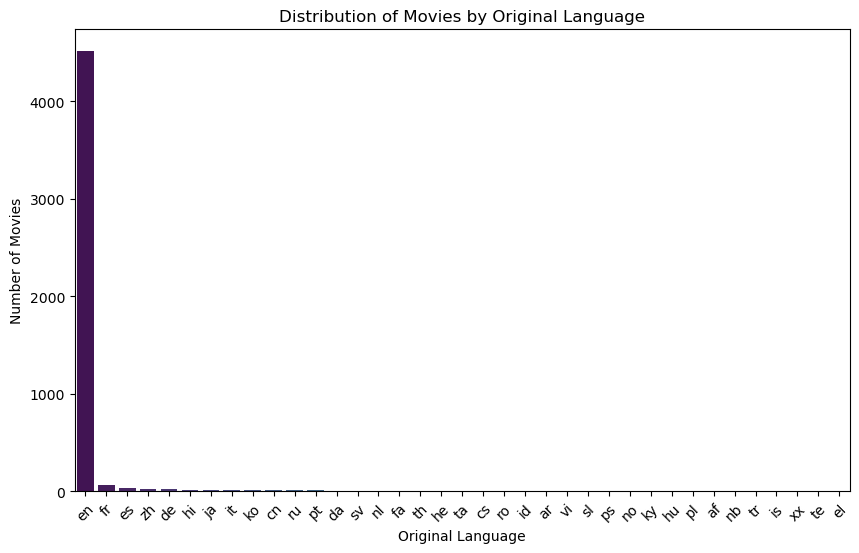

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of movies per language
language_counts = df['original_language'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette='viridis')
plt.title('Distribution of Movies by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


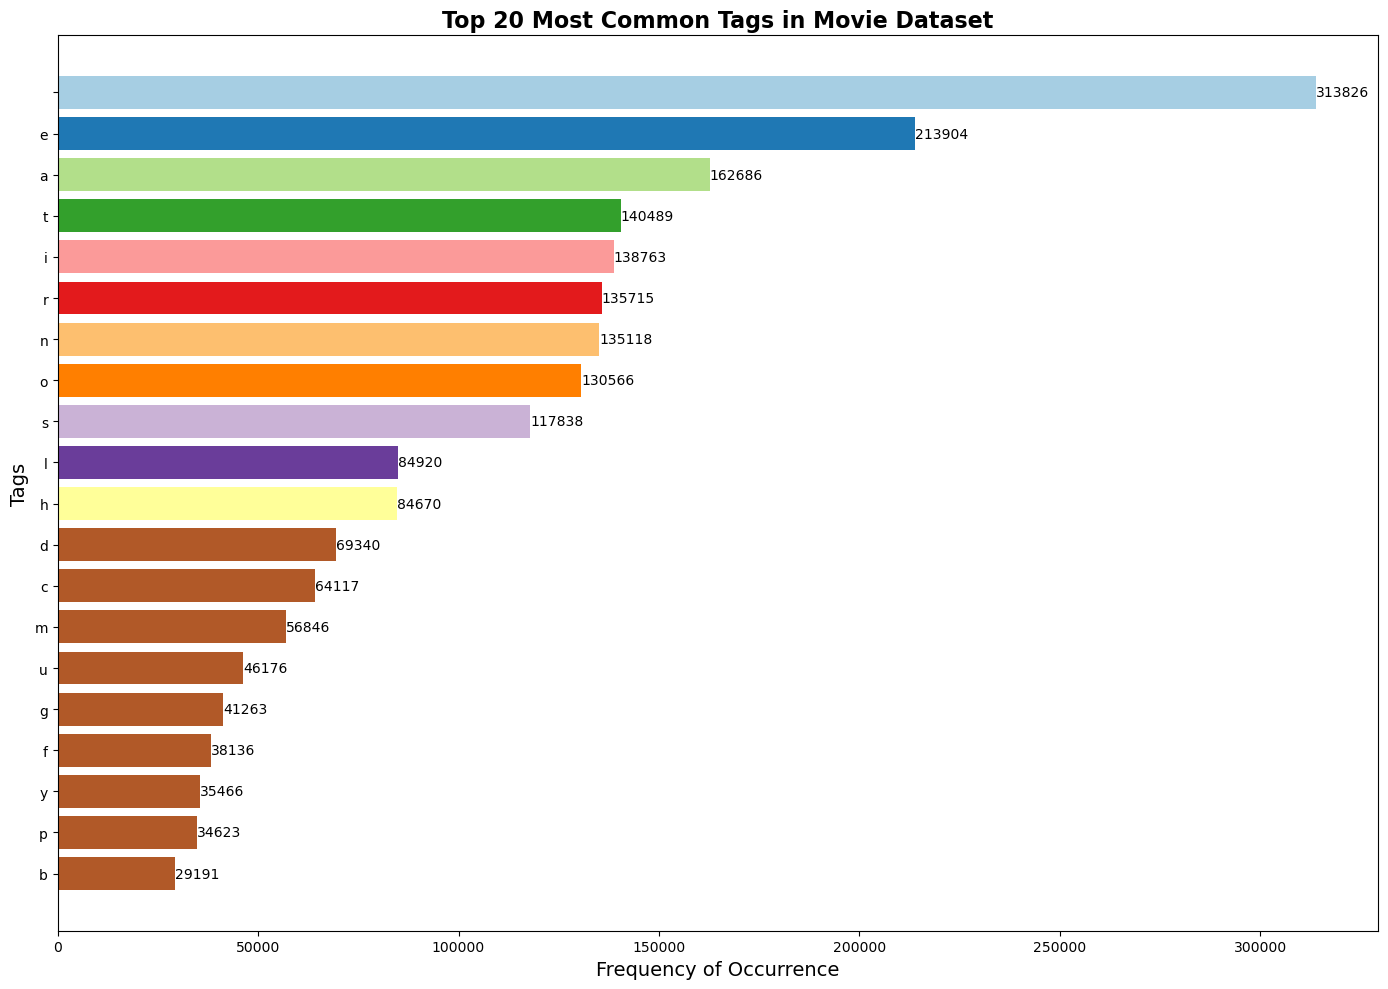

In [82]:
from collections import Counter
import matplotlib.pyplot as plt

# Flatten the list of tags
all_tags = [tag for sublist in df['tags'] for tag in sublist]

# Count the frequency of each tag
tag_counts = Counter(all_tags)
common_tags = tag_counts.most_common(20)  # Get the 20 most common tags

# Extract tags and their counts
tags, counts = zip(*common_tags)

# Plotting the horizontal bar chart
plt.figure(figsize=(14, 10))
bars = plt.barh(tags, counts, color=plt.cm.Paired(range(len(tags))))

# Add data labels to each bar
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width()}', va='center', ha='left', fontsize=10, color='black')

# Add title and labels with improved description
plt.title('Top 20 Most Common Tags in Movie Dataset', fontsize=16, fontweight='bold')
plt.xlabel('Frequency of Occurrence', fontsize=14)
plt.ylabel('Tags', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top

# Show the plot
plt.tight_layout()
plt.show()



In [44]:
# NLTK (Natural Language Toolkit is an NLP toolkit that helps in text or language segmentation)
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Carl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
from nltk.stem.porter import PorterStemmer  # The Porter Stemmer is an algorithm for stemming words, which reduces words to their root form. 
ps = PorterStemmer()
from nltk.tokenize import word_tokenize  # word_tokenize is used to split a string of text into individual words (tokens).

In [46]:
from sklearn.feature_extraction.text import CountVectorizer  # CountVectorizer is a tool for converting a text of documents into a matrix of token counts. Basically is the first step in content-filtering.
cv = CountVectorizer(max_features=5000, stop_words='english')

In [47]:
vectors = cv.fit_transform(df['tags'])

In [48]:
feature_names= cv.get_feature_names_out()

In [49]:
stemmed_feature_names = [" ".join([ps.stem(word) for word in word_tokenize(feature)]) for feature in feature_names]

In [50]:
unique_stemmed_feature_names = []
seen = set()

for feature in stemmed_feature_names: 
    if feature not in seen: 
        unique_stemmed_feature_names.append(feature)
        seen.add(feature)

In [51]:
print(unique_stemmed_feature_names)

['000', '007', '10', '100', '11', '12', '13', '14', '15', '16', '17', '18', '18th', '19', '1930', '1940', '1944', '1950', '1960', '1970', '1971', '1974', '1976', '1980', '1985', '1990', '1999', '19th', '19thcenturi', '20', '200', '2003', '2009', '20th', '24', '25', '30', '300', '3d', '40', '50', '500', '60', '70', 'aaron', 'aaroneckhart', 'abandon', 'abduct', 'abigailbreslin', 'abil', 'abl', 'aboard', 'abus', 'academ', 'academi', 'accept', 'access', 'accid', 'accident', 'accompani', 'accomplish', 'account', 'accus', 'ace', 'achiev', 'act', 'action', 'actionhero', 'activist', 'activ', 'actor', 'actress', 'actual', 'adam', 'adamsandl', 'adamshankman', 'adapt', 'addict', 'adolesc', 'adopt', 'adrienbrodi', 'adult', 'adulteri', 'adulthood', 'advantag', 'adventur', 'advertis', 'advic', 'affair', 'affect', 'afghanistan', 'africa', 'african', 'africanamerican', 'aftercreditssting', 'afterlif', 'aftermath', 'age', 'agediffer', 'agenc', 'agenda', 'agent', 'aggress', 'ago', 'agre', 'ahead', 'aid'

In [52]:
vectors.shape

(4806, 5000)

In [53]:
from sklearn.metrics.pairwise import cosine_similarity

In [54]:
similarity = cosine_similarity(vectors)

In [55]:
similarity.shape

(4806, 4806)

In [56]:
similarity

array([[1.        , 0.08964215, 0.06071767, ..., 0.02519763, 0.0277885 ,
        0.        ],
       [0.08964215, 1.        , 0.06350006, ..., 0.02635231, 0.        ,
        0.        ],
       [0.06071767, 0.06350006, 1.        , ..., 0.02677398, 0.        ,
        0.        ],
       ...,
       [0.02519763, 0.02635231, 0.02677398, ..., 1.        , 0.07352146,
        0.04774099],
       [0.0277885 , 0.        , 0.        , ..., 0.07352146, 1.        ,
        0.05264981],
       [0.        , 0.        , 0.        , ..., 0.04774099, 0.05264981,
        1.        ]])

In [57]:
def recommend(movie):
    movie_lower = movie.lower()

    # This ensures that the operation is performed directly on the DataFrame
    df.loc[:,'title_lower'] = df['title'].str.lower()
    movie_index1 = df[df['title_lower'] == movie_lower].index

    if not movie_index1.empty: 
        movie_index1 = movie_index1[0]
        distances = similarity[movie_index1]
        movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:7]

        for i in movies_list:
            print(df.iloc[i[0]].title)
    df.drop('title_lower', axis=1, inplace=True)

In [58]:
recommend('hulk')           #testing

The Incredible Hulk
Shin Godzilla
The Island of Dr. Moreau
The Helix... Loaded
A Monster in Paris
Godzilla 2000


C:\Users\Carl\AppData\Local\Temp\ipykernel_18544\1377169989.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'title_lower'] = df['title'].str.lower()
C:\Users\Carl\AppData\Local\Temp\ipykernel_18544\1377169989.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('title_lower', axis=1, inplace=True)


In [59]:
import ipywidgets as widgets
from ipywidgets import interact
import pandas as pd

# Assuming `df` is your DataFrame and `similarity` is your similarity matrix

def recommend(movie):
    movie_lower = movie.lower()

    # Ensure the operation is performed directly on the DataFrame
    df.loc[:,'title_lower'] = df['title'].str.lower()
    movie_index1 = df[df['title_lower'] == movie_lower].index

    if not movie_index1.empty: 
        movie_index1 = movie_index1[0]
        distances = similarity[movie_index1]
        movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:7]

        recommended_movies = []
        for i in movies_list:
            recommended_movies.append(df.iloc[i[0]].title)
        
        # Return the list of recommended movies
        return recommended_movies
    else:
        return ["Movie not found in database"]

# Create an interactive dropdown for movie selection
movie_dropdown = widgets.Dropdown(
    options=sorted(df['title'].unique()), # Assuming `df` has a 'title' column
    description='Movie:',
    continuous_update=False,
)

# Create a function to display recommendations
def interactive_recommend(movie):
    recommendations = recommend(movie)
    for title in recommendations:
        print(title)

# Use interact to create the dashboard
interact(interactive_recommend, movie=movie_dropdown);


interactive(children=(Dropdown(description='Movie:', options=('#Horror', '(500) Days of Summer', '10 Cloverfie…

In [60]:
df.head()

,movie_id,title,tags,original_language,title_lower
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di...",en,avatar
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha...",en,pirates of the caribbean: at world's end
2,206647,Spectre,a cryptic message from bond’s past sends him o...,en,spectre
3,49026,The Dark Knight Rises,following the death of district attorney harve...,en,the dark knight rises
4,49529,John Carter,"john carter is a war-weary, former military ca...",en,john carter


In [61]:
import ipywidgets as widgets
from ipywidgets import interact
import pandas as pd
from IPython.display import display

def recommend(movie):
    movie_lower = movie.lower()

    # Use .loc to avoid SettingWithCopyWarning
    df.loc[:, 'title_lower'] = df['title'].str.lower()
    movie_index1 = df[df['title_lower'] == movie_lower].index

    if not movie_index1.empty:
        movie_index1 = movie_index1[0]
        
        # Assuming similarity is a NumPy array, not a DataFrame
        distances = similarity[movie_index1]
        
        # Get the top 6 recommendations (excluding the movie itself)
        movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:7]

        recommended_movies = []
        for i in movies_list:
            recommended_movies.append(df.iloc[i[0]].title)

        # Return the list of recommended movies
        return recommended_movies
    else:
        return ["Movie not found in database"]

# Create an interactive dropdown with search functionality for movie selection
movie_dropdown = widgets.Combobox(
    placeholder='Type or select a movie...',
    options=sorted(df['title'].unique()),  # Replace with your movie titles
    description='Movie:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Styling for output area
output_area = widgets.Output(layout={'border': '1px solid black', 'padding': '10px', 'background-color': '#f4f4f4'})

# Function to display recommendations
def interactive_recommend(movie):
    output_area.clear_output()
    with output_area:
        recommendations = recommend(movie)
        for title in recommendations:
            print(title)

# Use interact to create the dashboard
interact(interactive_recommend, movie=movie_dropdown);
display(output_area)


interactive(children=(Combobox(value='', description='Movie:', layout=Layout(width='50%'), options=('#Horror',…

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…